# Pandas Groupby Used to Find Ordered Data

> **Purpose:**  Often users feel like they need to loop through pandas but in many cases this is not necessary if a consistent pattern can be found.  If a pattern is not consistent then a for loop may be needed with highly specific logic to obtain the correct values.

> **Objective:**  In this file, I clean data that has some errors that would prevent groupby and other functions from being applied.  Step 1 is to clean the data and step two is to show how pandas can be used to find the first two records, indicating overall ranking for that year, of each year.


In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Obtain data
df = pd.read_csv("./data/Billboard.csv", low_memory=False)

In [3]:
# Preview
df.head()

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High,Verified,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,2015,262,h,2015-001,25.0,1.0,0.0,1.0,39,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,298,h,2015-002,34.0,27.0,2.0,2.0,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,301,h,2015-003,32.0,25.0,10.0,1.0,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,304,h,2015-004,16.0,5.0,0.0,1.0,18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,308,h,2015-005,20.0,0.0,0.0,1.0,44,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# slice only first 10 columns
df = df.iloc[:, 0:9]
df.head()

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High
0,2015,262,h,2015-001,25.0,1.0,0.0,1.0,39
1,2015,298,h,2015-002,34.0,27.0,2.0,2.0,10
2,2015,301,h,2015-003,32.0,25.0,10.0,1.0,7
3,2015,304,h,2015-004,16.0,5.0,0.0,1.0,18
4,2015,308,h,2015-005,20.0,0.0,0.0,1.0,44


In [5]:
# review data
df.describe()

,Year,CH,40,10,PK
count,39982.000000,39929.000000,27942.000000,27832.000000,30358.000000
mean,1967.166575,9.274162,4.523549,1.157445,1.545523
std,27.458659,7.564290,6.682420,3.088947,1.118186
min,1890.000000,0.000000,0.000000,0.000000,0.000000
25%,1949.000000,3.000000,0.000000,0.000000,1.000000
50%,1968.000000,7.000000,0.000000,0.000000,1.000000
75%,1988.000000,14.000000,8.000000,0.000000,2.000000
max,2015.000000,87.000000,63.000000,32.000000,17.000000


In [6]:
# check if data types are consistent or mixed
df.dtypes

Year             int64
Yearly Rank     object
Source          object
Prefix          object
CH             float64
40             float64
10             float64
PK             float64
High            object
dtype: object

In [7]:
#  Manually review 'High' data
df['High'].value_counts()[-50:-1]

61      249
68      248
50      248
32      248
38      248
36      247
37      247
69      247
53      244
65      244
74      243
89      243
55      243
77      243
44      242
56      240
66      240
41      240
79      238
48      238
43      237
73      237
45      236
83      236
34      235
33      234
59      233
31      233
46      227
49      227
98      226
40      226
80      226
90      225
47      222
85      220
99      206
100     152
--       26
2(3)      9
2(2)      7
1(2)      6
2(1)      6
1(6)      4
1(7)      3
1(5)      3
1(4)      3
1(3)      3
0         1
Name: High, dtype: int64

In [8]:
# Fix High column - bad datatypes

# remove na, '--', and "\" with default value
df['High'].fillna(100, inplace=True)
df['High'].value_counts()
df['High'].replace("--", 1000, inplace=True)
df.loc[ df['High'].str.contains(r"\)", na=False), 'High'] = 1000

# df['High'].value_counts()[-40:-1]
df['High'].dtypes

dtype('O')

In [9]:
# manually review 'Yearly Rank' data
df['Yearly Rank'].value_counts()[-50:-1]

217b    1
160b    1
252b    1
156b    1
201b    1
53b     1
11b     1
20a     1
269b    1
21b     1
448a    1
247b    1
308b    1
742     1
432b    1
347b    1
168a    1
142b    1
205b    1
44a     1
290b    1
47b     1
187b    1
493a    1
218b    1
175b    1
493b    1
501d    1
476b    1
204b    1
110b    1
180b    1
420b    1
63b     1
148b    1
44b     1
154a    1
25b     1
448b    1
33b     1
14b     1
48b     1
171b    1
237b    1
198b    1
622c    1
164b    1
493d    1
190b    1
Name: Yearly Rank, dtype: int64

In [10]:
# Fix Yearly Rank column
df['Yearly Rank'].fillna(100, inplace=True)

# replace bad Yearly Rank data with default value 
alpha = ["a", "b", "c", "d", "e", "f", "g"]
for i in alpha:
    df.loc[ df['Yearly Rank'].str.contains(i, na=False), 'Yearly Rank' ] = 1000

# df['Yearly Rank'].value_counts()[-150:-100]

In [11]:
# convert columns to numeric to obtain consistent data types
# above filtering was needed to make .to_numeric() work
df['High'] = pd.to_numeric(df['High'])
df['Yearly Rank'] = pd.to_numeric(df['Yearly Rank'])

In [12]:
# check consistency
df.dtypes

Year             int64
Yearly Rank      int64
Source          object
Prefix          object
CH             float64
40             float64
10             float64
PK             float64
High             int64
dtype: object

In [13]:
# review data (again)
# notice visible numeric columns
df.describe()

,Year,Yearly Rank,CH,40,10,PK,High
count,39982.000000,39982.000000,39929.000000,27942.000000,27832.000000,30358.000000,39982.000000
mean,1967.166575,217.874168,9.274162,4.523549,1.157445,1.545523,37.542269
std,27.458659,166.438334,7.564290,6.682420,3.088947,1.118186,50.903029
min,1890.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1949.000000,87.000000,3.000000,0.000000,0.000000,1.000000,9.000000
50%,1968.000000,186.000000,7.000000,0.000000,0.000000,1.000000,24.000000
75%,1988.000000,310.000000,14.000000,8.000000,0.000000,2.000000,62.000000
max,2015.000000,1000.000000,87.000000,63.000000,32.000000,17.000000,1000.000000


In [14]:
# find nonsensical data
df_bad_values = df [ (df['Yearly Rank'] > 500) | (df['High'] > 500) ]

In [15]:
# get df of only sensible data
df_slim = df.loc[ ~df.index.isin(df_bad_values.index) ]

In [16]:
# review data
df_slim.describe()

,Year,Yearly Rank,CH,40,10,PK,High
count,37286.000000,37286.000000,37237.000000,25448.000000,25338.000000,27860.000000,37286.000000
mean,1967.274071,189.597624,9.702634,4.954181,1.266043,1.571788,32.048356
std,28.316560,127.703217,7.604590,6.832238,3.207851,1.154920,27.995332
min,1890.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1947.000000,81.000000,4.000000,0.000000,0.000000,1.000000,8.000000
50%,1969.000000,172.000000,8.000000,1.000000,0.000000,1.000000,22.000000
75%,1989.000000,283.000000,14.000000,9.000000,0.000000,2.000000,54.000000
max,2015.000000,500.000000,87.000000,63.000000,32.000000,17.000000,100.000000


In [17]:
# look at only the top 2 songs of each year from df (all data without removing >500 values)
top2_df = df.sort_values(by='Yearly Rank').groupby("Year").head(2).sort_values(["Year", "Yearly Rank"])
top2_df

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High
39979,1890,1,m,1890_001,6.0,NaN,NaN,6.0,1
39980,1890,2,m,1890_002,6.0,NaN,NaN,6.0,1
39966,1891,1,m,1891_001,10.0,NaN,NaN,10.0,1
39967,1891,2,m,1891_002,7.0,NaN,NaN,7.0,1
39948,1892,1,m,1892_001,8.0,NaN,NaN,8.0,1
...,...,...,...,...,...,...,...,...,...
573,2013,2,h,2013_002,44.0,37.0,23.0,9.0,1
406,2014,1,h,2014_202,18.0,0.0,0.0,1.0,52
409,2014,2,h,2014_205,29.0,0.0,0.0,1.0,53
39,2015,40,h,2015-040,1.0,1.0,0.0,1.0,14


In [18]:
# look at only the top 2 songs of each year (filtered data)
top2_df_slim = df_slim.sort_values(by='Yearly Rank').groupby("Year").head(2).sort_values(["Year", "Yearly Rank"])
top2_df_slim

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High
39979,1890,1,m,1890_001,6.0,NaN,NaN,6.0,1
39980,1890,2,m,1890_002,6.0,NaN,NaN,6.0,1
39966,1891,1,m,1891_001,10.0,NaN,NaN,10.0,1
39967,1891,2,m,1891_002,7.0,NaN,NaN,7.0,1
39948,1892,1,m,1892_001,8.0,NaN,NaN,8.0,1
...,...,...,...,...,...,...,...,...,...
573,2013,2,h,2013_002,44.0,37.0,23.0,9.0,1
406,2014,1,h,2014_202,18.0,0.0,0.0,1.0,52
409,2014,2,h,2014_205,29.0,0.0,0.0,1.0,53
39,2015,40,h,2015-040,1.0,1.0,0.0,1.0,14


In [19]:
# How do the results of df and df_slim (unfiltered and filter) compare
# Compare doesn't work without resetting and sorting index
top2_df_temp = top2_df.sort_index().reset_index(drop=True)
top2_df_slim_temp = top2_df_slim.sort_index().reset_index(drop=True)

# displays only the records that are different.  
# in documentation 'self' represents top2_df_temp and 'other' represents top2_df_slim
# as indicated below, items with a High of 1000 were earlier filtered outso they show up here
top2_df_temp.compare(top2_df_slim_temp)

Yearly Rank          Prefix              CH          High      
           self other      self     other  self other    self other
200         1.0  25.0  1915_001  1915_025  13.0   8.0  1000.0   3.0
201         2.0  26.0  1915_002  1915_026  12.0   8.0  1000.0   3.0
202         1.0  22.0  1914_001  1914_022  14.0   9.0  1000.0   3.0
203         2.0  23.0  1914_002  1914_023  13.0   8.0  1000.0   3.0

In [23]:
# check to see if top2_df_temp changes
# note that the compare did not alter the dataframe (above is just a view)
top2_df_temp

,Year,Yearly Rank,Source,Prefix,CH,40,10,PK,High
0,2015,40,h,2015-040,1.0,1.0,0.0,1.0,14
1,2015,41,h,2015-041,1.0,1.0,0.0,1.0,34
2,2014,1,h,2014_202,18.0,0.0,0.0,1.0,52
3,2014,2,h,2014_205,29.0,0.0,0.0,1.0,53
4,2013,1,h,2013_001,48.0,40.0,21.0,12.0,1
...,...,...,...,...,...,...,...,...,...
247,1892,2,m,1892_002,6.0,NaN,NaN,6.0,1
248,1891,1,m,1891_001,10.0,NaN,NaN,10.0,1
249,1891,2,m,1891_002,7.0,NaN,NaN,7.0,1
250,1890,1,m,1890_001,6.0,NaN,NaN,6.0,1


In [21]:
# Use groupby to get the worst ranking song of each year - notice sort occurs before groupby to get the values in Yearly Rank ordered then 
# after the groupby df is sorted by the Year
worst_rank_df_slim = df_slim.sort_values(by='Yearly Rank', ascending=False).groupby("Year")[["Year", "Yearly Rank"]].head(1).sort_values(by="Year")
worst_rank_df_slim

,Year,Yearly Rank
39981,1890,3
39978,1891,13
39965,1892,18
39947,1893,14
39933,1894,16
...,...,...
1857,2011,496
1360,2012,373
986,2013,412
563,2014,409


In [22]:
# Use groupby to get the best ranking song of each year  - notice sort occurs before groupby to get the values in Yearly Rank ordered then 
# after the groupby df is sorted by the Year
top_rank_df_slim = df_slim.sort_values(by='Yearly Rank', ascending=True).groupby("Year")[["Year", "Yearly Rank"]].head(1).sort_values(by="Year")
top_rank_df_slim

,Year,Yearly Rank
39979,1890,1
39966,1891,1
39948,1892,1
39934,1893,1
39918,1894,1
...,...,...
1361,2011,1
987,2012,1
572,2013,1
406,2014,1


In [23]:
# Use a groupby to quickly get sortable lists - notice sort occurs before groupby (that is important)
plot_slim_df = df_slim.sort_values(by='Yearly Rank', ascending=True).groupby("Year")["Yearly Rank"].apply(list)
plot_slim_df

Year
1890                                            [1, 2, 3]
1891          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
1892    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
1893      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
1894    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
                              ...                        
2011    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...
2012    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
2013    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
2014    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
2015    [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 5...
Name: Yearly Rank, Length: 126, dtype: object

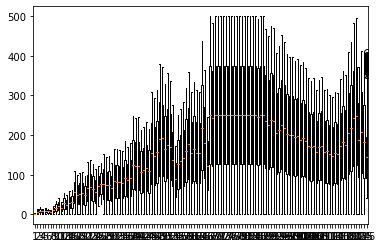

In [24]:
# Example of a boxplot as a result of a groupby
# Note:  This data is not a good exmaple of a boxplot due to the large amount of data.  
# The purpose of the task was to demonstrate the application of groupbys
plt.boxplot(plot_slim_df);